In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [11]:
adv_df=pd.read_csv("advertising.csv")
adv_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


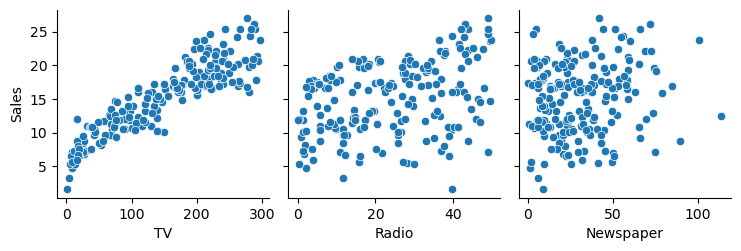

In [23]:
sns.pairplot(data=adv_df,
            x_vars=['TV','Radio','Newspaper'],
            y_vars='Sales')

In [24]:
adv_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [27]:
X=adv_df['TV']
y=adv_df['Sales']

In [27]:
### Linear Regression using  statsmodel


In [31]:
#train-test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.7, random_state=100)
X_train.shape

(140,)

In [34]:
#statsmodel
X_train_sm=sm.add_constant(X_train)
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [37]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params


const    6.948683
TV       0.054546
dtype: float64

In [38]:
# Sales= 0.054546xTV + 6.948683

In [40]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.52e-52
Time:                        22:02:34   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

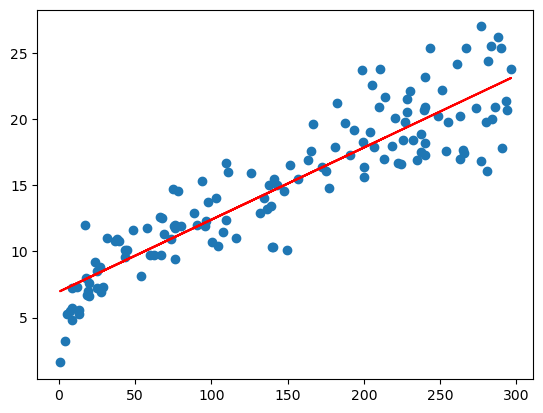

In [43]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.9487+0.0545*X_train,'r')
plt.show()

In [59]:

y_train_pred=6.9487+0.0545*X_train

res=y_train-y_train_pred

C:\Users\88017\AppData\Local\Temp\ipykernel_29152\3003513444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


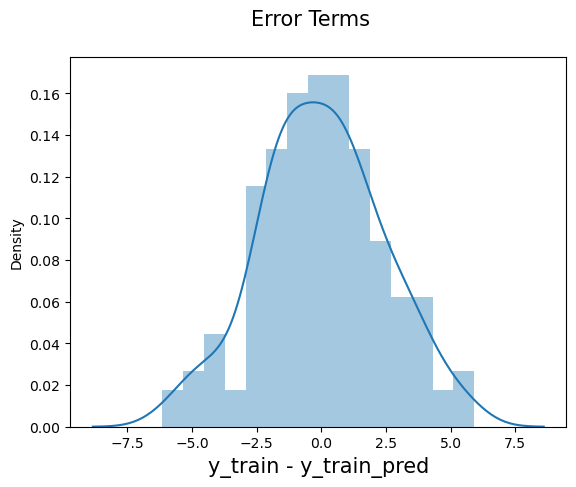

In [60]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

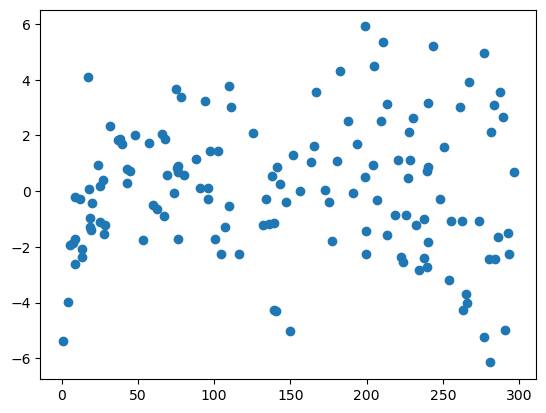

In [61]:
plt.scatter(X_train,res)
plt.show()

In [62]:
y_test_pred=6.9487+0.0545*X_test


In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [64]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7916277461108928

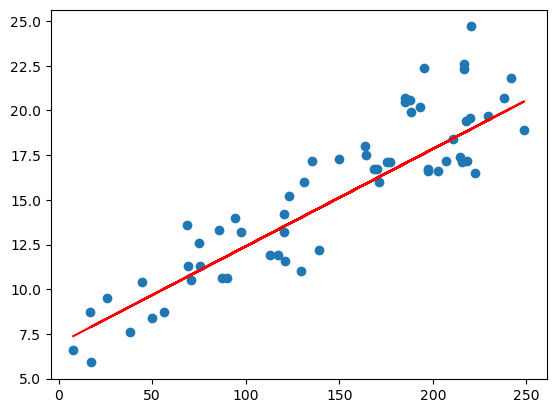

In [66]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9487 + 0.0545 * X_test, 'r')
plt.show()

In [70]:
#Linear Regression using `linear_model` in `sklearn`
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [69]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [96]:
X_train_lm.shape


(140,)

In [94]:
arr_X_train_lm=X_train_lm.values
arr_X_train_lm = arr_X_train_lm.reshape(-1,1)
arr_X_train_lm.shape

(140, 1)

In [97]:
arr_X_test_lm=X_test_lm.values
arr_X_test_lm = arr_X_test_lm.reshape(-1,1)
arr_X_test_lm.shape

(60, 1)

In [99]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(arr_X_train_lm, y_train_lm)

LinearRegression()

In [100]:
print(lm.intercept_)
print(lm.coef_)

6.9486832000013585
[0.05454575]


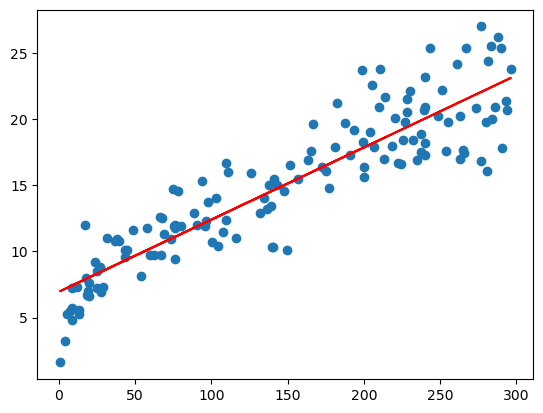

In [103]:
plt.scatter(X_train_lm,y_train_lm)
plt.plot(X_train_lm,6.9486832000013585+0.05454575*X_train_lm,'r')
plt.show()